In [1]:
# data
import pandas as pd
import numpy as np

In [59]:
df = pd.DataFrame({
    "Chest Pain" : [1,0,1,1,0,0,1,1],
    "Blocked Arteries": [1,1,0,1,1,1,0,1],
    "Patient Weight": [205, 180, 210, 167, 156, 125, 168, 172],
    "Heart Desiease": [1,1,1,1,0,0,0,0]
})
df

,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease
0,1,1,205,1
1,0,1,180,1
2,1,0,210,1
3,1,1,167,1
4,0,1,156,0
5,0,1,125,0
6,1,0,168,0
7,1,1,172,0


0.19999999999999996

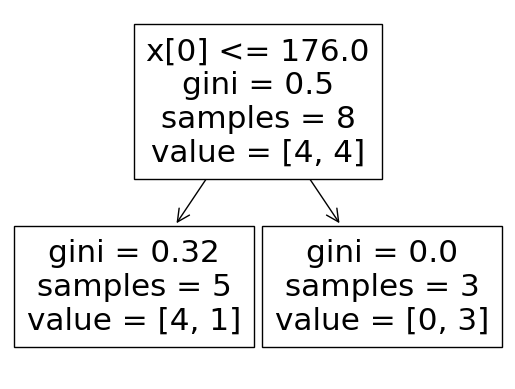

In [4]:
from sklearn import tree

x = np.array(df['Patient Weight']).reshape(-1, 1)
y = np.array(df['Heart Desiease'])

t1 = tree.DecisionTreeClassifier(max_depth=1)
v1 = t1.fit(x,y)
tree.plot_tree(t1)

[n,n1,n2] = t1.tree_.n_node_samples
[i, i1,i2] = t1.tree_.impurity

g = (n1*i1 + n2*i2)/n
g

In [6]:
df['prediction_t1'] = t1.predict(x)

In [10]:
df['weight'] = 1/len(df)

In [11]:
df

,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease,prediction_t1,weight
0,1,1,205,1,1,0.125
1,0,1,180,1,1,0.125
2,1,0,210,1,1,0.125
3,1,1,167,1,0,0.125
4,0,1,156,0,0,0.125
5,0,1,125,0,0,0.125
6,1,0,168,0,0,0.125
7,1,1,172,0,0,0.125


In [12]:
total_error = (df['weight'][df['Heart Desiease'] != df['prediction_t1']]).sum()

In [13]:
total_error

0.125

In [14]:
t1_amount_of_say = 0.5*np.log((1-total_error)/total_error)

In [15]:
t1_amount_of_say

0.9729550745276566

In [21]:
df['weight_new'] = [df['weight'][i]*np.exp(-t1_amount_of_say) if df['Heart Desiease'][i] == df['prediction_t1'][i]   else df['weight'][i]*np.exp(t1_amount_of_say) for i in range(len(df))]

In [22]:
df

,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease,prediction_t1,weight,weight_new
0,1,1,205,1,1,0.125,0.047246
1,0,1,180,1,1,0.125,0.047246
2,1,0,210,1,1,0.125,0.047246
3,1,1,167,1,0,0.125,0.330719
4,0,1,156,0,0,0.125,0.047246
5,0,1,125,0,0,0.125,0.047246
6,1,0,168,0,0,0.125,0.047246
7,1,1,172,0,0,0.125,0.047246


In [24]:
df['weight_new'] = df['weight_new']/df['weight_new'].sum()

In [25]:
df

,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease,prediction_t1,weight,weight_new
0,1,1,205,1,1,0.125,0.071429
1,0,1,180,1,1,0.125,0.071429
2,1,0,210,1,1,0.125,0.071429
3,1,1,167,1,0,0.125,0.500000
4,0,1,156,0,0,0.125,0.071429
5,0,1,125,0,0,0.125,0.071429
6,1,0,168,0,0,0.125,0.071429
7,1,1,172,0,0,0.125,0.071429


In [26]:
df['weight'] = df['weight_new']
df.drop(columns=['weight_new'], inplace=True)
df

,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease,prediction_t1,weight
0,1,1,205,1,1,0.071429
1,0,1,180,1,1,0.071429
2,1,0,210,1,1,0.071429
3,1,1,167,1,0,0.500000
4,0,1,156,0,0,0.071429
5,0,1,125,0,0,0.071429
6,1,0,168,0,0,0.071429
7,1,1,172,0,0,0.071429


In [29]:
import random

In [38]:
t2_datachoices = random.choices(population = range(len(df)), weights = df['weight'] , k = len(df) )

In [43]:
df2 = df.loc[t2_datachoices]

In [47]:
df2.reset_index(inplace=True)

In [48]:
df2

,index,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease,prediction_t1,weight
0,0,1,1,205,1,1,0.071429
1,5,0,1,125,0,0,0.071429
2,1,0,1,180,1,1,0.071429
3,2,1,0,210,1,1,0.071429
4,3,1,1,167,1,0,0.500000
5,3,1,1,167,1,0,0.500000
6,0,1,1,205,1,1,0.071429
7,4,0,1,156,0,0,0.071429


In [49]:
df2.drop(columns=['prediction_t1', 'weight'], inplace=True)

In [50]:
df2

,index,Chest Pain,Blocked Arteries,Patient Weight,Heart Desiease
0,0,1,1,205,1
1,5,0,1,125,0
2,1,0,1,180,1
3,2,1,0,210,1
4,3,1,1,167,1
5,3,1,1,167,1
6,0,1,1,205,1
7,4,0,1,156,0


0.0

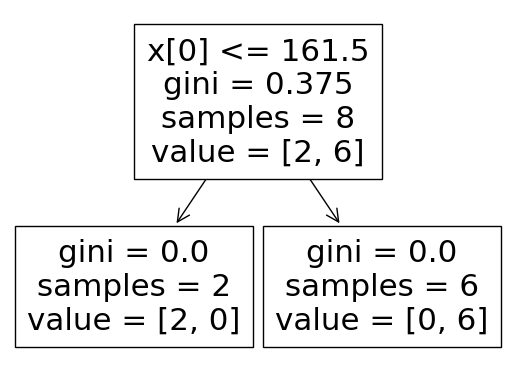

In [54]:
x = np.array(df2['Patient Weight']).reshape(-1, 1)
y = np.array(df2['Heart Desiease'])

t1 = tree.DecisionTreeClassifier(max_depth=1)
v1 = t1.fit(x,y)
tree.plot_tree(t1)

[n,n1,n2] = t1.tree_.n_node_samples
[i, i1,i2] = t1.tree_.impurity

g = (n1*i1 + n2*i2)/n
g

In [55]:
(t1,2.0)

(DecisionTreeClassifier(max_depth=1), 2.0)

In [56]:
t1.tree_

In [60]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()


df = pd.DataFrame({
    "Chest Pain" : [1,0,1,1,0,0,1,1],
    "Blocked Arteries": [1,1,0,1,1,1,0,1],
    "Patient Weight": [205, 180, 210, 167, 156, 125, 168, 172],
    "Heart Desiease": [1,1,1,1,0,0,0,0]
})

x = np.array(df.drop(columns='Heart Desiease'))
y = np.array(df['Heart Desiease'])

clf.fit(x,y)


AdaBoostClassifier()

In [61]:
clf.predict(x)

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [62]:
y

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)